# **K-Nearest-Neighbor Classification**
## ECE 204 Data Science & Engineering

## Reading the data

Let's look at the Iris dataset. We have already seen this dataset in the **"Clustering"** case study before.
This dataset measures a bunch of flower measurements (Petal Length, Petal Width, Sepal Length, Sepal Width) for different types of flowers.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg" width="200" /> <br>

In the Clustering case study, we used K-Means to cluster the flowers into different groups without making use of the labels (unsupervised learning).

In this case study, we will use K-Nearest-Neighbors (KNN) to train a classifier using the labeled flowers. We will then use this information to predict labels for test flowers.

In [1]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.sample(10)

,petalLength,petalWidth,sepalLength,sepalWidth,species
44,1.9,0.4,5.1,3.8,setosa
117,6.7,2.2,7.7,3.8,virginica
17,1.4,0.3,5.1,3.5,setosa
21,1.5,0.4,5.1,3.7,setosa
48,1.5,0.2,5.3,3.7,setosa
76,4.8,1.4,6.8,2.8,versicolor
108,5.8,1.8,6.7,2.5,virginica
77,5.0,1.7,6.7,3.0,versicolor
25,1.6,0.2,5.0,3.0,setosa
38,1.3,0.2,4.4,3.0,setosa


In [2]:
# a useful method for categorical data
#df.species.unique()
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Let's see what different classes or species of flowers are present in the dataset

In [3]:
# the describe method does something different when data is categorical!
df.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

So there are 50 datapoints each belonging to one of three flower-species or classes. <br>

## Visualizing the data

Since it's difficult to visualize 4 dimensions, let's plot all combinations of these features pair-wise and see if these data points are separable.

In [4]:
df.columns

Index(['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth', 'species'], dtype='object')

In [13]:
features = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']

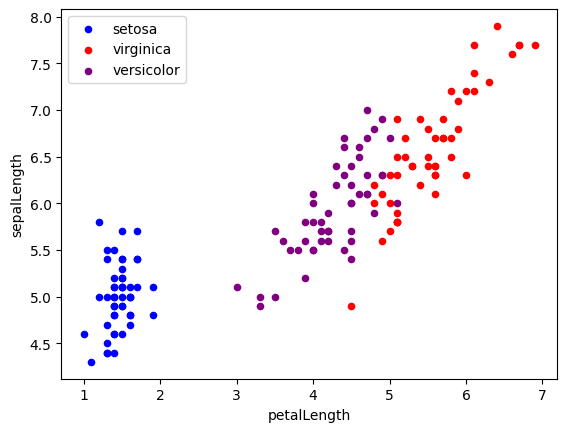

In [14]:
i,j = 0,2
ax = df[df.species=='setosa'].plot.scatter(x=features[i], y=features[j], c='blue')
df[df.species=='virginica'].plot.scatter(x=features[i], y=features[j], c='red', ax=ax)
df[df.species=='versicolor'].plot.scatter(x=features[i], y=features[j], c='purple', ax=ax)
ax.legend(['setosa','virginica','versicolor'])

## K-Nearest Neighbour Algorithm

First, let's train and test on the whole dataset of 150 points.

In [15]:
# We select the training features and labels
Xtrain, Xtest = df[features].iloc[::2], df[features].iloc[1::2]
Ytrain, Ytest = df.species.iloc[::2], df.species.iloc[1::2]

### Training with K = 5

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
knn.fit(Xtrain,Ytrain)

# Predicting with Xtrain
Ypred = knn.predict(Xtest)

# compute (number of correct predictions) / (total number of predictions)
accuracy = sum(Ytrain == Ypred) / len(Ypred)
print("The model accuracy is: ", accuracy)

The model accuracy is:  0.96


In [19]:
# A built-in way of measuring accuracy:
from sklearn.metrics import accuracy_score

round(accuracy_score(Ytrain, Ypred), 2)

0.96

That means that with K=5, we have achieved 96.67% accuracy on testing with the same dataset we trained with. <br>
Let's see what happens with K = 1, i.e. with just 1 Nearest Neighbour.

### Training with K = 1

In [9]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(Xtrain, Ytrain)
Ypred1 = knn1.predict(Xtrain)

print("Model accuracy:", accuracy_score(Ytrain, Ypred1))

Model accuracy: 0.92


Why does this happen?

<!-- We are using the same data for testing that we trained with. KNN has memorized the training data, which means that with K=1, for any test point that it has already seen, it will find that point itself as the nearest neighbour! When you increase K, it starts considering other points in its vicinity that may not have the same label, especially when the classes are not neatly separated-->